In [1]:
import pandas as pd
import numpy as np

# Natural Language Processing (NLP) 

One way of improving our algorithm's score is to go through a pre-processing step before vectorizing the data. NLP pre-processing before vectorizing the data.  Here are the steps:
- Change Case
- Tokenization
- Stop-Words Removal
- Stemming or Lemmatization
- N-grams
- Vectorization 

In [2]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\Data_Oqali\merged.csv', low_memory=False, sep=',')
df = df[["Code_produit", "Secteur", "Famille", "Denomination_de_vente", "Nom", "Conservation", "Ingrédient"]]
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Lait fermente sucre a boire aux fruits enrichi...,GERVAIS A BOIRE,Frais,lait ecreme reconstitue sucre fruit creme epai...
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Yaourt a boire sucre aromatise,P TIT YOP PARFUM FRAISE,Frais,yaourt au lait partiellement ecreme sucre siro...
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Yaourt a boire sucre aux fruits,YOCO A BOIRE,Frais,yaourt au lait mg sucre fruits fruit fruit fr...
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,Yaourt a boire sucre aux fruits,YOCO A BOIRE,Frais,yaourt au lait mg sucre fraise fructose conce...
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,,FROMAGE BLANC MG,Frais,lait ecreme pasteurise creme pasteurisee ferme...
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,Sirop d orange,SIROP D ORANGE,Ambiant,sucre eau jus d orange a base de concentre aci...
65794,101537,Sirops et boissons concentrees a diluer,Sirops,Sirop de fruits exotiques,SIROP TROPICAL,Ambiant,sucre eau jus de fruits a base de concentres j...
65795,101540,Sirops et boissons concentrees a diluer,Sirops,Sirop de the peche,SIROP THE PECHE,Ambiant,sucre eau jus de peche a base de concentre aci...
65796,101542,Sirops et boissons concentrees a diluer,Sirops,Sirop de grenadine,SIROP DE GRENADINE,Ambiant,sirop de glucose fructose eau sucre liquide ju...


## Change Case

One of the most typical text preprocessing Python processes is to convert the text to the same case, ideally lower case. Converting all text to lowercase ensures that all word strings follow a consistent structure.

In our case, there is no loss of information because the capital letters on the ingredients give no information on their classification into sectors or families.

In [3]:
df["Denomination_de_vente"]= df["Denomination_de_vente"].apply(lambda x: x.lower())
df["Nom"]= df[df["Nom"].notna() == True]["Nom"].apply(lambda x: x.lower())
df["Conservation"]= df["Conservation"].apply(lambda x: x.lower())
df["Ingrédient"]= df["Ingrédient"].apply(lambda x: x.lower())
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait fermente sucre a boire aux fruits enrichi...,gervais a boire,frais,lait ecreme reconstitue sucre fruit creme epai...
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt a boire sucre aromatise,p tit yop parfum fraise,frais,yaourt au lait partiellement ecreme sucre siro...
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt a boire sucre aux fruits,yoco a boire,frais,yaourt au lait mg sucre fruits fruit fruit fr...
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt a boire sucre aux fruits,yoco a boire,frais,yaourt au lait mg sucre fraise fructose conce...
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,,fromage blanc mg,frais,lait ecreme pasteurise creme pasteurisee ferme...
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,sirop d orange,sirop d orange,ambiant,sucre eau jus d orange a base de concentre aci...
65794,101537,Sirops et boissons concentrees a diluer,Sirops,sirop de fruits exotiques,sirop tropical,ambiant,sucre eau jus de fruits a base de concentres j...
65795,101540,Sirops et boissons concentrees a diluer,Sirops,sirop de the peche,sirop the peche,ambiant,sucre eau jus de peche a base de concentre aci...
65796,101542,Sirops et boissons concentrees a diluer,Sirops,sirop de grenadine,sirop de grenadine,ambiant,sirop de glucose fructose eau sucre liquide ju...


## Tokenization

Tokenization is the process of transforming a sentence into a stream of words known as "tokens." Tokens are the fundamental building blocks upon which analysis and other approaches are constructed. 

The criterion on which we based the tokenization is spaces, since we had already tokenized the text previously.

In [4]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = text.split(sep = ' ')
    return tokens
#applying function to the column
df["Denomination_de_vente"]= df["Denomination_de_vente"].apply(lambda x: tokenization(x))
df["Nom"]= df[df["Nom"].notna() == True]["Nom"].apply(lambda x: tokenization(x))
df["Conservation"]= df["Conservation"].apply(lambda x: tokenization(x))
df["Ingrédient"]= df["Ingrédient"].apply(lambda x: tokenization(x))

In [5]:
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[lait, fermente, sucre, a, boire, aux, fruits,...","[gervais, a, boire]",[frais],"[lait, ecreme, reconstitue, sucre, fruit, crem..."
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, a, boire, sucre, aromatise]","[p, tit, yop, parfum, fraise]",[frais],"[yaourt, au, lait, partiellement, ecreme, sucr..."
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, a, boire, sucre, aux, fruits]","[yoco, a, boire]",[frais],"[yaourt, au, lait, , mg, sucre, fruits, fruit,..."
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, a, boire, sucre, aux, fruits]","[yoco, a, boire]",[frais],"[yaourt, au, lait, , mg, sucre, fraise, fructo..."
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,"[, ]","[fromage, blanc, , mg]",[frais],"[lait, ecreme, pasteurise, creme, pasteurisee,..."
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,"[sirop, d, orange]","[sirop, d, orange]",[ambiant],"[sucre, eau, jus, d, orange, a, base, de, conc..."
65794,101537,Sirops et boissons concentrees a diluer,Sirops,"[sirop, de, fruits, exotiques]","[sirop, tropical]",[ambiant],"[sucre, eau, jus, de, fruits, a, base, de, con..."
65795,101540,Sirops et boissons concentrees a diluer,Sirops,"[sirop, de, the, peche]","[sirop, the, peche]",[ambiant],"[sucre, eau, jus, de, peche, a, base, de, conc..."
65796,101542,Sirops et boissons concentrees a diluer,Sirops,"[sirop, de, grenadine]","[sirop, de, grenadine]",[ambiant],"[sirop, de, glucose, fructose, eau, sucre, liq..."


## Stop-Words Removal

Stopwords are frequently used words that are eliminated from the text because they provide no value to the analysis. These words have little or no meaning.

A list of terms that are regarded as stopwords in the French language is included in the NLTK library. However, it is not required to utilize the list of stopwords provided because they should be carefully picked based on the project. 

As our project was related to the food industry, we decided, for example, to add words such as "measures", frequently used in ingredient lists or product names, but which provided no information on product classification.

In [6]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('french')
inrae_dictio = ["", "a", "mg", "cm", "g", "gl", "ml", "k", "el", "ed", "gr" "k" "mi" "st" "the" , "kg", "dl", "l", "cl", "about", "ad", "al", "and", "in", "it", "too"]
for word in inrae_dictio:
    stopwords.append(word)

stopwords

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [7]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df["Denomination_de_vente"]= df["Denomination_de_vente"].apply(lambda x: remove_stopwords(x))
df["Nom"]= df[df["Nom"].notna() == True]["Nom"].apply(lambda x: remove_stopwords(x))
df["Conservation"]= df["Conservation"].apply(lambda x: remove_stopwords(x))
df["Ingrédient"]= df["Ingrédient"].apply(lambda x: remove_stopwords(x))

## Stemming or Lemmatization 

This steps is really important for the text standardisation. There are basically two similar methods for this standardization, and we're going to choose one of them for the reasons we'll see later.
- Stemming, also known as desuffixation, changes the word by its root. For example, Fraise will give Frais, Frais will give Frai...
- Lemmatization involves taking the word in its canonical form. For example, a noun in the plural will be put in the singular, a conjugated verb will be put in the infinitive...

The disadvantage of stemming is that it stems the words such that its root form loses the meaning.

However, we're going to use stemming for several reasons:
Firstly, lemmentization is not sufficiently advanced in French, and packages contain too many errors.
Secondly, given that the variables are ingredients or food names, the context and meaning of the words are not important to us, as they are familiar words in the French language. 
Finally, there's a big difference between the two algorithms: stemming is much faster.
Note: Ingredients are marked without accents, which poses a problem for both algorithms, which only take exact spellings into account. It is therefore necessary to make an indentation.




A lemmatizer also converts different word forms or inflections to a standard form. For example, it would convert less to little, wrote to write, slept to sleep, etc. 

A lemmatizer works with more rules of the language and contextual information than does a stemmer. It also relies on a dictionary to look up matching words. Because of that, it requires more processing power and time than a stemmer to generate output. For these reasons, some NLP applications only use a stemmer and not a lemmatizer. 

It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

The difference between Stemming and Lemmatization can be understood with the example provided below.

In [46]:
import nltk
import string
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Thomas
[nltk_data]     Aujoux\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Thomas
[nltk_data]     Aujoux\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Thomas
[nltk_data]     Aujoux\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:

lemmatizer = FrenchLefffLemmatizer()

def preprocess_text(df):
    a = len(df)
    for i in range(len(df)):
        for j in range(len(df.iloc[i, 2])):
            df.iloc[i, 2][j] = lemmatizer.lemmatize(df.iloc[i, 2][j])
            if len(df.iloc[i, 2][j])<=2 :
                df.iloc[i, 2][j] = ""
            if len(df.iloc[i, 2][j])>3 and df.iloc[i, 2][j][-3 :] == "ees":
                df.iloc[i, 2][j] = df.iloc[i, 2][j][:-2]
            if len(df.iloc[i, 2][j])>3 and df.iloc[i, 2][j][-1] == "s":
                df.iloc[i, 2][j] = df.iloc[i, 2][j][:-1]
            if len(df.iloc[i, 2][j])>3 and df.iloc[i, 2][j][-2 :] == "ee":
                df.iloc[i, 2][j] = df.iloc[i, 2][j][:-1]
    return df

preprocess_text(df)


,Code_produit,Secteur,no_stopwords
0,450,Produits laitiers et desserts frais,"[lait, ecreme, reconstitue, sucre, fruit, crem..."
1,453,Produits laitiers et desserts frais,"[yaourt, lait, partiellement, ecreme, sucre, s..."
2,455,Produits laitiers et desserts frais,"[yaourt, lait, , sucre, fruit, fruit, fruit, f..."
3,456,Produits laitiers et desserts frais,"[yaourt, lait, , sucre, fraise, fructose, conc..."
4,460,Produits laitiers et desserts frais,"[lait, ecreme, pasteurise, creme, pasteurise, ..."
...,...,...,...
66503,101536,Sirops et boissons concentrees a diluer,"[sucre, eau, jus, orange, base, concentre, aci..."
66504,101537,Sirops et boissons concentrees a diluer,"[sucre, eau, jus, fruit, base, concentre, jus,..."
66505,101540,Sirops et boissons concentrees a diluer,"[sucre, eau, jus, peche, base, concentre, acid..."
66506,101542,Sirops et boissons concentrees a diluer,"[sirop, glucose, fructose, eau, sucre, liquide..."


In [49]:
df['Nom'][1]

['p', 'tit', 'yop', 'parfum', 'fraise']

In [8]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')


def preprocess_text_stemm(df, column):
    for i in range(len(df[column])):
        for j in range(len(df[column][i])):
            df[column][i][j] = stemmer.stem(df[column][i][j])
        while("" in df[column][i]):
            df[column][i].remove("")

    return df


In [14]:
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[lait, ferment, sucr, boir, fruit, enrich, vit...","[gerv, boir]",[frais],"[lait, ecreme, reconstitue, sucre, fruit, crem..."
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, boir, sucr, aromatis]","[p, tit, yop, parfum, frais]",[frais],"[yaourt, lait, partiellement, ecreme, sucre, s..."
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, boir, sucr, fruit]","[yoco, boir]",[frais],"[yaourt, lait, sucre, fruits, fruit, fruit, fr..."
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"[yaourt, boir, sucr, fruit]","[yoco, boir]",[frais],"[yaourt, lait, sucre, fraise, fructose, concen..."
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,[],"[fromag, blanc]",[frais],"[lait, ecreme, pasteurise, creme, pasteurisee,..."
...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,"[sirop, orang]","[sirop, orange]",[ambiant],"[sucre, eau, jus, orange, base, concentre, aci..."
65794,101537,Sirops et boissons concentrees a diluer,Sirops,"[sirop, fruit, exot]","[sirop, tropical]",[ambiant],"[sucre, eau, jus, fruits, base, concentres, ju..."
65795,101540,Sirops et boissons concentrees a diluer,Sirops,"[sirop, the, pech]","[sirop, the, peche]",[ambiant],"[sucre, eau, jus, peche, base, concentre, acid..."
65796,101542,Sirops et boissons concentrees a diluer,Sirops,"[sirop, grenadin]","[sirop, grenadine]",[ambiant],"[sirop, glucose, fructose, eau, sucre, liquide..."


In [15]:
#df = preprocess_text_stemm(df, "Nom")
df = preprocess_text_stemm(df, "Conservation")
df = preprocess_text_stemm(df, "Ingrédient")

AttributeError: 'str' object has no attribute 'remove'

In [11]:
df = preprocess_text_stemm(df, "Denomination_de_vente")
df = preprocess_text_stemm(df, "Nom")
df = preprocess_text_stemm(df, "Conservation")
df = preprocess_text_stemm(df, "Ingrédient")

TypeError: object of type 'float' has no len()

In [12]:
df.loc[df.Nom.isnull()] = df.loc[df.Nom.isnull()].apply(lambda x: [""])

In [47]:
df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean_for_stat.csv')

In [16]:
df['Denomination_de_vente'] = [' '.join(map(str, l)) for l in df['Denomination_de_vente']]
df['Nom'] = [' '.join(map(str, l)) for l in df['Nom']]
df['Conservation'] = [' '.join(map(str, l)) for l in df['Conservation']]
df['Ingrédient'] = [' '.join(map(str, l)) for l in df['Ingrédient']]
df["words"] = df['Denomination_de_vente'] + df['Nom'] + df['Conservation'] + df['Ingrédient']

In [17]:
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient,words
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait ferment sucr boir fruit enrich vitamin b b,gerv boir,frais,lait ecreme reconstitue sucre fruit creme epai...,lait ferment sucr boir fruit enrich vitamin b ...
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr aromatis,p tit yop parfum frais,frais,yaourt lait partiellement ecreme sucre sirop g...,yaourt boir sucr aromatisp tit yop parfum frai...
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr fruit,yoco boir,frais,yaourt lait sucre fruits fruit fruit fructose ...,yaourt boir sucr fruityoco boirfraisyaourt lai...
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr fruit,yoco boir,frais,yaourt lait sucre fraise fructose concentre mi...,yaourt boir sucr fruityoco boirfraisyaourt lai...
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,,fromag blanc,frais,lait ecreme pasteurise creme pasteurisee ferme...,fromag blancfraislait ecreme pasteurise creme ...
...,...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,sirop orang,sirop orange,ambiant,sucre eau jus orange base concentre acidifiant...,sirop orangsirop orangeambiantsucre eau jus or...
65794,101537,Sirops et boissons concentrees a diluer,Sirops,sirop fruit exot,sirop tropical,ambiant,sucre eau jus fruits base concentres jus orang...,sirop fruit exotsirop tropicalambiantsucre eau...
65795,101540,Sirops et boissons concentrees a diluer,Sirops,sirop the pech,sirop the peche,ambiant,sucre eau jus peche base concentre acidifiant ...,sirop the pechsirop the pecheambiantsucre eau ...
65796,101542,Sirops et boissons concentrees a diluer,Sirops,sirop grenadin,sirop grenadine,ambiant,sirop glucose fructose eau sucre liquide jus f...,sirop grenadinsirop grenadineambiantsirop gluc...


## N-Grams

The N-gram is the frequency the some N number of text tokens appears in a text, in our case in ingredients or the name of a product. A 1-gram is simply the frequency that a single token appears, it is also called the weight of the 1-gram.



In [ ]:
from sklearn.base import clone
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
#df = df[["Code_produit", "Secteur", "no_stopwords"]]


from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer(analyzer=lambda x: x)
count_matrix = coun_vect.fit_transform(df["Nom"])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df[["Code_produit", "Secteur", "Famille"]], df_vect], axis=1)
#new_df = new_df.drop('', axis=1)

In [19]:
z = new_df.columns.values

In [57]:
new_df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv')

## N-gram

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
tfidf = TfidfVectorizer(smooth_idf=True, max_features = 2000, ngram_range = (1,3), token_pattern='(?u)\\b\\w\\w*\\b')
clmn = ColumnTransformer([("tfidf", tfidf, 'Denomination_de_vente')],remainder="passthrough")
clmn.fit_transform(df)

AttributeError: 'list' object has no attribute 'lower'

In [71]:
from sklearn.base import clone
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True,
                             max_features = 2000,
                             ngram_range = (1,3),
                             token_pattern='(?u)\\b\\w\\w*\\b'                                                     
                             )
pipe = make_column_transformer([
   (clone(vectorizer), 'Denomination_de_vente'),
   (clone(vectorizer), 'Nom')
]).fit(df)

df2 = pd.DataFrame(pipe.todense()).rename(columns=dict(zip(vectorizer.vocabulary_.values(),
vectorizer.vocabulary_.keys())))
new_df = pd.concat([df[["Code_produit", "Secteur"]], df2], axis=1)

TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. '(TfidfVectorizer(max_features=2000, ngram_range=(1, 3),
                token_pattern='(?u)\\b\\w\\w*\\b'), 'Denomination_de_vente')' (type <class 'tuple'>) doesn't.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True,
                             max_features = 1500,
                             ngram_range = (1,3),
                             token_pattern='(?u)\\b\\w\\w*\\b'                                                     
                             )

words = vectorizer.fit_transform(df.words)

df2 = pd.DataFrame(words.todense()).rename(columns=dict(zip(vectorizer.vocabulary_.values(),
vectorizer.vocabulary_.keys())))
new_df = pd.concat([df[["Code_produit", "Secteur", "Famille"]], df2], axis=1)

In [53]:
df

,Code_produit,Secteur,Famille,Denomination_de_vente,Nom,Conservation,Ingrédient,words
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait ferment sucr boir fruit enrich vitamin b b,gerv boir,frais,lait ecreme reconstitue sucre fruit creme epai...,lait ferment sucr boir fruit enrich vitamin b ...
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr aromatis,p tit yop parfum frais,frais,yaourt lait partiellement ecreme sucre sirop g...,yaourt boir sucr aromatisp tit yop parfum frai...
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr fruit,yoco boir,frais,yaourt lait sucre fruits fruit fruit fructose ...,yaourt boir sucr fruityoco boirfraisyaourt lai...
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,yaourt boir sucr fruit,yoco boir,frais,yaourt lait sucre fraise fructose concentre mi...,yaourt boir sucr fruityoco boirfraisyaourt lai...
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,,fromag blanc,frais,lait ecreme pasteurise creme pasteurisee ferme...,fromag blancfraislait ecreme pasteurise creme ...
...,...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,sirop orang,sirop orange,ambiant,sucre eau jus orange base concentre acidifiant...,sirop orangsirop orangeambiantsucre eau jus or...
65794,101537,Sirops et boissons concentrees a diluer,Sirops,sirop fruit exot,sirop tropical,ambiant,sucre eau jus fruits base concentres jus orang...,sirop fruit exotsirop tropicalambiantsucre eau...
65795,101540,Sirops et boissons concentrees a diluer,Sirops,sirop the pech,sirop the peche,ambiant,sucre eau jus peche base concentre acidifiant ...,sirop the pechsirop the pecheambiantsucre eau ...
65796,101542,Sirops et boissons concentrees a diluer,Sirops,sirop grenadin,sirop grenadine,ambiant,sirop glucose fructose eau sucre liquide jus f...,sirop grenadinsirop grenadineambiantsirop gluc...


In [77]:
df.words

0        l a i t   f e r m e n t   s u c r   b o i r   ...
1        y a o u r t   b o i r   s u c r   a r o m a t ...
2        y a o u r t   b o i r   s u c r   f r u i ty o...
3        y a o u r t   b o i r   s u c r   f r u i ty o...
4        f r o m a g   b l a n cf r a i sl a i t   e c ...
                               ...                        
65793    s i r o p   o r a n gs i r o p   o r a n ga m ...
65794    s i r o p   f r u i t   e x o ts i r o p   t r...
65795    s i r o p   t h e   p e c hs i r o p   t h e  ...
65796    s i r o p   g r e n a d i ns i r o p   g r e n...
65797    s i r o p   m e n t h   i s s u   a g r i c u ...
Name: words, Length: 65798, dtype: object

In [76]:
new_df

,Code_produit,Secteur,Famille,a,a a,a a b,a a i,a a m,a a r,a a s,...,z z p,z z r,z z s,za,za m,za m b,zf,zf r,zf r a,zs
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.192508,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,453,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.214760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,455,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.186388,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.215299,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,0.180748,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65793,101536,Sirops et boissons concentrees a diluer,Sirops,0.232369,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65794,101537,Sirops et boissons concentrees a diluer,Sirops,0.163243,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65795,101540,Sirops et boissons concentrees a diluer,Sirops,0.080671,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65796,101542,Sirops et boissons concentrees a diluer,Sirops,0.145662,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
t = df2.sum(axis=0).sort_values(ascending=False)

In [55]:
len(t)

1500

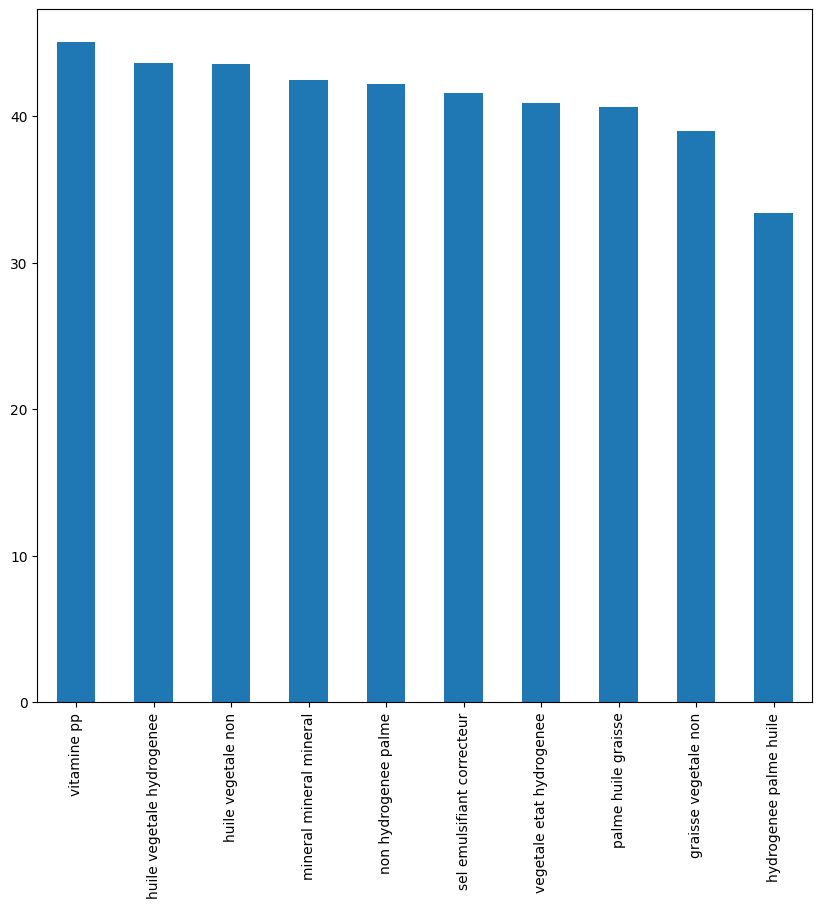

In [56]:
ax = t[1490:].plot( figsize=(10,9),kind = 'bar')

In [100]:
df['no_stopwords'] = [' '.join(map(str, l)) for l in df['no_stopwords']]

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer(ngram_range=(1, 1))
count_matrix = coun_vect.fit_transform(df["no_stopwords"])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df[["Code_produit", "Secteur"]], df_vect], axis=1)
#new_df = new_df.drop('', axis=1)

In [115]:
df = df[["Code_produit", "Secteur", "no_stopwords"]]


from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer(ngram_range=(1, 3))
count_matrix = coun_vect.fit_transform(df["no_stopwords"])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df[["Code_produit", "Secteur"]], df_vect], axis=1)
#new_df = new_df.drop('', axis=1)

MemoryError: Unable to allocate 330. GiB for an array with shape (66508, 665990) and data type int64

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
document = df["no_stopwords"]

# Don't need both X and transformer; they should be identical
X = vectorizer.fit_transform(document)
matrix_terms = np.array(vectorizer.get_feature_names_out())

# Use the axis keyword to sum over rows
matrix_freq = np.asarray(X.sum(axis=0)).ravel()
final_matrix = np.array([matrix_terms,matrix_freq])

In [116]:
final_matrix = pd.DataFrame(final_matrix)

In [105]:
vectorizer = CountVectorizer(ngram_range=(1, 1))

In [106]:
X = vectorizer.fit_transform(document)

In [107]:
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [109]:
matrix_terms = np.array(vectorizer.get_feature_names_out())

In [102]:
z = new_df.columns.values

In [52]:
df.head()
df.iloc(["no_stopwords"])

TypeError: unhashable type: 'list'

In [81]:
(pd.Series(nltk.ngrams(df.iloc[:,2], 2)).value_counts())[:10]

([sucr, pat, cacao, beurr, cacao, cacao, maigr, poudr, emulsifi, arom, fruit, coqu, cereal, lait, cacao, noir, extra, chocolat, noir, extra, fin, noir, extra, chocolat, noir, extra, fin, ambi], [sucr, pat, cacao, beurr, cacao, cacao, maigr, poudr, emulsifi, arom, fruit, coqu, cereal, lait, cacao, noir, extra, chocolat, noir, extra, fin, noir, extra, chocolat, noir, extra, fin, ambi])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [91]:
class NGramLM(object):

    def __init__(self, N, tokens):
        """
        Intializes an N-Gram Language Model using
        a list of tokens. It trains the language model
        using `train` and saves it to the attribute
        self.mdl
        
        Parameter(s):
            N (int): The N-Gram length to create.
            tokens (list-like object): Tokens to use to create N-Grams.
        """
        self.N = N


        ngrams = tokens
        self.mdl = self.train(ngrams)

        # If N < 2 then we can't create any NGram models
        if N < 2:
            raise Exception('N must be greater than 1')
        elif N == 2:
            # If we're generating start tokens, we only ever start with <START>
            self.prev_mdl = pd.value_counts(['<START>'], normalize=True)
        else:
            self.prev_mdl = NGramLM(N-1, tokens)

    def create_ngrams(self, tokens) -> list:
        """
        create_ngrams takes in a list of tokens and returns a list of N-Grams.
        
        Parameter(s):
            tokens (list-like object): tokens to create N-Grams from.
        """
        # Create tuples of length N from the tokens
        final_ngrams = []

        # we only iterate through len(tokens) - (N - 1) because our last NGrams must be length N
        for i in range(len(tokens)-(self.N-1)):

            # Set for more efficient lookup
            set_tokens = set(tokens[i:i+self.N])

            # Don't include token if <START> is anywhere but the beginning
            if "<START>" in set_tokens and tokens[i] != "<START>":
                continue

            # Don't include token if <STOP> is anywhere but the end
            if "<STOP>" in set_tokens and tokens[i+self.N - 1] != "<STOP>":
                continue

            final_ngrams.append(tuple(tokens[i:i+self.N]))

        return final_ngrams

    def train(self, ngrams) -> pd.DataFrame:
        """
        Trains a N-Gram language model given a list of tokens.
        The output is a dataframe with three columns (ngram, n1gram, prob).
        
        Parameter(s):
            ngrams (list): A list of ngrams of the appropriate length N.
        """

        # N-Gram counts C(w_1, ..., w_n)
        ngram_counts = pd.value_counts(ngrams)

        # (N-1)-Gram counts C(w_1, ..., w_(n-1))
        n_1_grams = [x[:self.N-1] for x in ngrams]
        n_1_gram_counts = pd.value_counts(n_1_grams)

        # Create the conditional probabilities
        probs = []
        n1_grams_col = []
        for ngram in ngram_counts.index:
            # Probability is P(1st & 2nd & ... & last item) / P(1st & 2nd & ... & last item - 1)
            # We approximate this by using the Count(1st & 2nd & ... & last item) / Count(1st & 2nd & ... & last item - 1)
            n_1_count = n_1_gram_counts[ngram[:self.N-1]]
            ngram_count = ngram_counts[ngram]
            n1_grams_col.append(ngram[:self.N-1])
            probs.append(ngram_count/n_1_count)

        # Put it all together
        return pd.DataFrame({'ngram': ngram_counts.index, 'n1gram': n1_grams_col, 'prob': probs}).sort_values('prob').reset_index(drop=True)

    def ngrams_for_graph(self) -> pd.DataFrame:
        """
        ngrams for graph returns a dataframe with three columns:
        - n1gram: the preceding words
        - next_word: the next word in the 
        - probability: the probability that the next word would occur in given the n1gram
        """
				# We can build the DataFrame using these two columns
        df = self.mdl[['ngram', 'prob']]

        # Helper function to get the tokens from the ngram
        def get_items(row):
            item = row.iloc[0]
            if len(row) == 2:
                return (item[0], item[-1])
            return (' '.join(item[:-1]), item[-1])

        new_df = df[['ngram']].apply(
            get_items, axis='columns', result_type='expand')
        new_df['prob'] = df['prob']
        new_df.columns = ['prev_word', 'next_word', 'probability']

        return new_df.sort_values(['prev_word', 'probability'])

In [92]:
df.iloc[:,2]

0        [lait, ecrem, reconstitu, sucr, fruit, crem, e...
1        [yaourt, lait, partiel, ecrem, sucr, sirop, gl...
2        [yaourt, lait, sucr, fruit, fruit, fruit, fruc...
3        [yaourt, lait, sucr, frais, fructos, concentr,...
4        [lait, ecrem, pasteuris, crem, pasteurise, fer...
                               ...                        
66503    [sucr, eau, jus, orang, bas, concentr, acidifi...
66504    [sucr, eau, jus, fruit, bas, concentr, jus, or...
66505    [sucr, eau, jus, pech, bas, concentr, acidifi,...
66506    [sirop, glucos, fructos, eau, sucr, liquid, ju...
66507    [sucr, cann, liquid, eau, arom, naturel, menth...
Name: no_stopwords, Length: 66508, dtype: object

In [93]:
allston_tokens = df[["no_stopwords"]]
bigram_model = NGramLM(2, allston_tokens)
bigram_model.ngrams_for_graph()

ValueError: could not broadcast input array from shape (66508,1) into shape (66508,)

In [90]:
df[["no_stopwords"]]

,no_stopwords
0,"[lait, ecrem, reconstitu, sucr, fruit, crem, e..."
1,"[yaourt, lait, partiel, ecrem, sucr, sirop, gl..."
2,"[yaourt, lait, sucr, fruit, fruit, fruit, fruc..."
3,"[yaourt, lait, sucr, frais, fructos, concentr,..."
4,"[lait, ecrem, pasteuris, crem, pasteurise, fer..."
...,...
66503,"[sucr, eau, jus, orang, bas, concentr, acidifi..."
66504,"[sucr, eau, jus, fruit, bas, concentr, jus, or..."
66505,"[sucr, eau, jus, pech, bas, concentr, acidifi,..."
66506,"[sirop, glucos, fructos, eau, sucr, liquid, ju..."


In [64]:
e

['lait',
 'ecreme',
 'reconstitue',
 'sucre',
 'fruit',
 'creme',
 'epaississant',
 'epaississant',
 'epaississant',
 'colorant',
 'mineraux',
 'lait',
 'jus',
 'concentre',
 'sureau',
 'arome',
 'ferment',
 'lactique',
 'yaourt',
 'vitamine',
 '',
 'vitamine',
 '',
 'vitamine',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 '',
 '',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 '',
 '',
 'frai']

In [65]:
e = df.iloc[0,2]
while("" in e):
    e.remove("")
e

['lait',
 'ecreme',
 'reconstitue',
 'sucre',
 'fruit',
 'creme',
 'epaississant',
 'epaississant',
 'epaississant',
 'colorant',
 'mineraux',
 'lait',
 'jus',
 'concentre',
 'sureau',
 'arome',
 'ferment',
 'lactique',
 'yaourt',
 'vitamine',
 'vitamine',
 'vitamine',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 'frai']

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# ngram range for each cuisine
stemmer = PorterStemmer()
ngram_counters = {}
for key, value in cuisine_dict.items():
    rng = [len(word_tokenize(stemmer.stem(wc))) for wc, val in value.items()]  
    local_ngram_counter = Counter(rng)
    ngram_counters[key] = local_ngram_counter
    local_series = pd.Series(local_ngram_counter)
    local_series.plot(kind="bar", figsize=(10,6), title="NGram for %s cuisine" % key)  
    plt.show()

In [ ]:
# vector of ngram for each cuisine
ngram_index = {}
for key, value in ngram_counters.items():
    ngram_index[key] = dict(value)
df_ngram = pd.DataFrame.from_dict(ngram_index, orient='index')
df_ngram = df_ngram.fillna(0)
df_ngram[0:30]

In [ ]:
# getting the percentage of ngram for each cuisines
totalcount = df_ngram.sum().sum()
ngram_sum = df_ngram.sum().groupby(level=0).apply(lambda x: 100*x/float(totalcount))
ngram_sum.plot(kind="bar", title="Percentile Range of Word NGram")
ngram_sum[0:50]